# OKCupid Data Analysis

## Part 1: Clustering the data

In the following code, we will analyze the data from a database of OKCupid profiles to uncover trends in profile content, success, and failure. The first analysis will be to see if we can guess success or failure based on profiles' body type, smoking habits, and education level.

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [6]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [7]:
df['ed_number'] = df.education.map({'graduated from college/university': 2, 'graduated from masters program': 3, 'working on college/university': 1, 'working on masters program': 2, 'graduated from two-year college': 1, 'graduated from ph.d program': 4, 'graduated from law school': 4, 'graduated from high school': 0, 'working on two-year college': 0, 'dropped out of college/university': 0, 'working on ph.d program': 3, 'college/university': 2, 'graduated from space camp': 0, 'dropped out of space camp': 0, 'graduated from med school': 4, 'working on space camp': 0, 'working on law school': 3, 'two-year college': 1, 'working on med school': 3, 'dropped out of two-year college': 0, 'dropped out of masters program': 2, 'masters program': 3, 'dropped out of ph.d program': 3, 'dropped out of high school': 0, 'high school': 0, 'working on high school': 0, 'space camp': 0, 'ph.d program': 3, 'law school': 3, 'dropped out of law school': 2, 'dropped out of med school': 2, 'med school': 3})
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,ed_number
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,1.0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,2.0


In [46]:
df.smokes.value_counts()
df['smokes_num'] = df.smokes.map({'no': 0, 'sometimes': 2, 'when drinking': 1, 'yes': 4, 'trying to quit': 3})
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,religion,sex,sign,smokes,speaks,status,ed_number,smokes_num,bt_num,drinks_n
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,agnosticism and very serious about it,m,gemini,sometimes,english,single,1.0,2.0,0.0,2.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0.0,0.0,1.0,3.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,0.0,2.0,2.0
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,NaN,m,pisces,no,"english, german (poorly)",single,1.0,0.0,2.0,2.0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,m,aquarius,no,english,single,2.0,0.0,2.0,2.0


In [47]:
df.body_type.value_counts()
df['bt_num'] = df.body_type.map({'average': 1, 'fit': 2, 'athletic': 2, 'thin': 2, 'curvy': 0, 'a little extra': 0, 'skinny': 1, 'full figured': 0, 'overweight': 0, 'jacked': 1, 'used up': 0, 'rather not say': 0})
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,religion,sex,sign,smokes,speaks,status,ed_number,smokes_num,bt_num,drinks_n
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,agnosticism and very serious about it,m,gemini,sometimes,english,single,1.0,2.0,0.0,2.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0.0,0.0,1.0,3.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,0.0,2.0,2.0
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,NaN,m,pisces,no,"english, german (poorly)",single,1.0,0.0,2.0,2.0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,m,aquarius,no,english,single,2.0,0.0,2.0,2.0


In [48]:
data = df[['ed_number', 'smokes_num' 'bt_num']]
data.head()
data = data.dropna()
data = scale(data)

In [49]:
#Conducting PCA for 2D representation of the data
decomp = PCA(n_components=2)
decomp.fit(data)
data = decomp.transform(data)
print(data)

[[ 2.4567129  -0.65362884]
 [ 1.23902341 -0.26655201]
 [-1.32156015  0.32133494]
 ...
 [-0.68459716 -0.8359396 ]
 [ 1.79375357  2.14091704]
 [ 0.53733618  0.12405398]]


In [50]:
classifier = KMeans(n_clusters=2)
classifier.fit(data)
labels = classifier.predict(data)

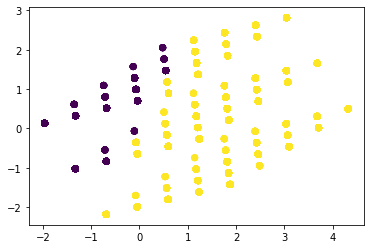

In [51]:
x = data[:,0]
y = data[:,1]
plt.scatter(x, y, c=labels)
plt.show()

This test, while imperfect as the numerical representations of each category were somewhat arbitrarily chosen, shows a slight, but ultimately inconclusive degree of correlation.

## Part 2: Predicting Zodiac Symbols

In this portion of the data analysis, we will see if we can determine the user's Zodiac symbol based on their other characteristics.  Is astrology actually correlative?

In [71]:
#Preprocessing feature data
df['drinks_n'] = df.drinks.map({"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5})
df['drugs_n'] = df.drugs.map({"never": 0, "sometimes": 1, "often": 2})
df['essays_n'] = df.essay0.apply(lambda x: len(x) if type(x) == str else 0) + df.essay1.apply(lambda x: len(x) if type(x) == str else 0) + df.essay2.apply(lambda x: len(x) if type(x) == str else 0) + df.essay3.apply(lambda x: len(x) if type(x) == str else 0) + df.essay4.apply(lambda x: len(x) if type(x) == str else 0) + df.essay5.apply(lambda x: len(x) if type(x) == str else 0) + df.essay6.apply(lambda x: len(x) if type(x) == str else 0) + df.essay7.apply(lambda x: len(x) if type(x) == str else 0) + df.essay8.apply(lambda x: len(x) if type(x) == str else 0) + df.essay9.apply(lambda x: len(x) if type(x) == str else 0)
df2 = df.dropna(subset=['sign'])
zf_data = df2[['smokes_num', 'drinks_n', 'drugs_n', 'essays_n']]
zf_data = zf_data.fillna(0)
zf_data = scale(zf_data)
print(zf_data)

[[ 1.5254754   0.20851995 -0.40381621  0.1674268 ]
 [-0.43032384  1.50784958  2.23450723 -0.41383551]
 [-0.43032384  0.20851995 -0.40381621  1.56958183]
 ...
 [-0.43032384 -2.39013932 -0.40381621 -0.21861727]
 [ 2.50337501  0.20851995  4.87283067 -0.14785066]
 [ 1.5254754   0.20851995 -0.40381621  0.55883938]]


In [74]:
#Preprocessing labels
zlabels = df.sign
zlabels = zlabels.dropna()
zlabels = zlabels.apply(lambda x: x.split()[0])
zlabels = zlabels.map({'leo': 0, 'gemini': 1, 'libra': 2, 'cancer': 3, 'virgo': 4, 'taurus': 5, 'scorpio': 6, 'aries': 7, 'pisces': 8, 'sagittarius': 9, 'aquarius': 10, 'capricorn': 11})
print(len(zlabels))
print(len(zf_data))
zlabels.value_counts()

48890
48890


0     4374
1     4310
2     4207
3     4206
4     4141
5     4140
6     4134
7     3989
8     3946
9     3942
10    3928
11    3573
Name: sign, dtype: int64

In [75]:
#Splitting train and test data
btrain_data, test_data, btrain_labels, test_labels = train_test_split(zf_data, zlabels, test_size=0.2)
#Splitting train and cv data
train_data, cv_data, train_labels, cv_labels = train_test_split(btrain_data, btrain_labels, test_size=0.2)

In [97]:
#Train a Neural Network to classify outputs
top_score = 0
for i in range(1, 5):
    for j in range(1, 5):
        clf = MLPClassifier(hidden_layer_sizes=(i, j))
        clf.fit(train_data, train_labels)
        score = clf.score(cv_data, cv_labels)
        if score > top_score:
            top_score = score
            num_layers = i
            num_neurons = j
print(f"Best Score: {top_score} \nNumber of layers: {num_layers} \nNumber of Perceptrons: {num_neurons}")

Best Score: 0.08947973923047424 
 Number of layers: 1 
 Number of Perceptrons: 2


In [101]:
clf_opt = MLPClassifier(hidden_layer_sizes=(2, 1))
clf_opt.fit(train_data, train_labels)
accuracy = clf_opt.score(test_data, test_labels)
pred = clf_opt.predict(test_data)
fscore = f1_score(test_labels, pred, average='macro')
print(f"Accuracy: {accuracy} \nF Score: {fscore}")

Accuracy: 0.0859071384741256 
F Score: 0.02439571341751236


## Conclusions

Ultimately, the neural network, despite being optimized using both cross-validation to determine optimal layer size and perceptrons did not converge on a conclusion that was accurate or showed any meaningful correlation in F1 testing.